In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

In [2]:
import statsmodel.api as sm

ModuleNotFoundError: No module named 'statsmodel'

In [3]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)

np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)

true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values




# Step 1: Import necessary libraries




In [4]:
import numpy as np  # For handling numerical data

import matplotlib.pyplot as plt  # For data visualization

from sklearn.linear_model import LinearRegression  # For building the regression model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model

import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
 

In [5]:
#Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [6]:
model=LinearRegression()

In [7]:
model.fit(X,Y)

LinearRegression()

In [20]:
c = model.intercept_
m= model.coef_[0]
 
print(f"Intercept: {c}")
print(f"Coefficients: {m}")

Intercept: 27.430065779800536
Coefficients: 4.965498141580591


In [21]:

print(f"Equation of the line: Y = {m:.2f}X + {c:.2f}")


Equation of the line: Y = 4.97X + 27.43


In [22]:
Y_pred=model.predict(X)
print(Y)

[32.48357077 34.30867849 43.23844269 52.61514928 48.82923313 53.82931522
 67.89606408 68.83717365 67.65262807 77.71280022]


* Model Evaluation Metrics*


***1.Mean Squared Error***

In [23]:
mse=mean_squared_error(Y,Y_pred)
print(f'Mean Squared Error :{mse:.2f}')

Mean Squared Error :11.75


In [24]:
#Mean Absolute Error
mae=mean_absolute_error(Y,Y_pred)
print(f'Mean Absolute Error:{mae:.2f}')

Mean Absolute Error:2.87


In [26]:
#Root Mean Squared Error
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error:{rmse:.2f}')

Root Mean Squared Error:3.43


In [27]:
#R-Squared
r2=r2_score(Y,Y_pred)
print(f'R-Squared:{r2:.2f}')

R-Squared:0.95


In [28]:
n=len(Y)
p=1
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f'Adjusted R-Squared:{adj_r2:.2f}')

Adjusted R-Squared:0.94


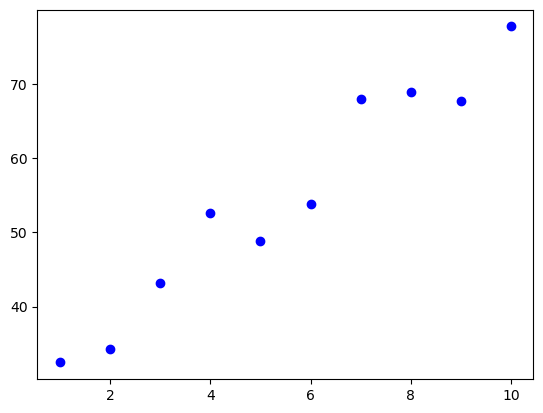

In [29]:
plt.scatter(X,Y,color='blue',label='Actual Data')

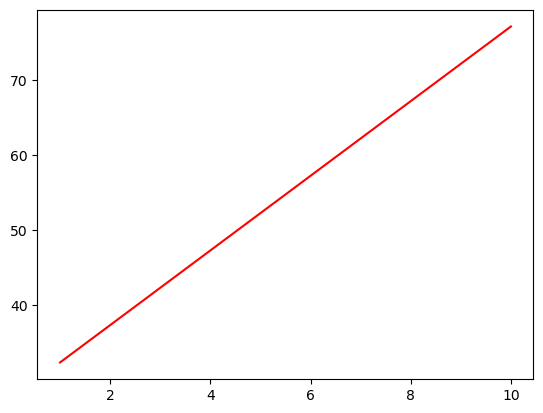

In [32]:
plt.plot(X,Y_pred,color='red',label='Best Fit Line')

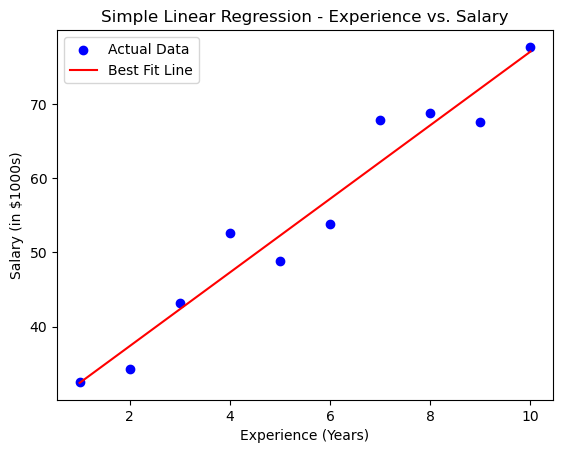

In [33]:
# Step 8: Plot the actual data points
plt.scatter(X, Y, color='blue', label='Actual Data')  # Scatter plot of actual values

# Step 9: Plot the Regression line (Best Fit Line)
plt.plot(X, Y_pred, color='red', label='Best Fit Line')  # Regression line

# Step 10: Add Labels and Legend
plt.xlabel('Experience (Years)')  # Label for X-axis
plt.ylabel('Salary (in $1000s)')  # Label for Y-axis
plt.title('Simple Linear Regression - Experience vs. Salary')  # Title of the plot
plt.legend()  # Show legend

# Step 11: Display the graph
plt.show()  # Show the final plotted graph


In [34]:
# User can input experience, and the model will predict salary
while True:
    try:
        exp = float(input("\nEnter years of experience to predict salary (or -1 to exit): "))
        if exp == -1:
            break  # Exit the loop
        predicted_salary = model.predict(np.array([[exp]]))[0]
        print(f"Predicted Salary for {exp} years of experience: ${predicted_salary:.2f}K")
    except ValueError:
        print("Please enter a valid number!")



Enter years of experience to predict salary (or -1 to exit): 10
Predicted Salary for 10.0 years of experience: $77.09K

Enter years of experience to predict salary (or -1 to exit): 25
Predicted Salary for 25.0 years of experience: $151.57K

Enter years of experience to predict salary (or -1 to exit): -1


***Steps for Simple Linear Regression***


Step 1: Import necessary libraries
    
 Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
    
 Step 3: Creating a Linear Regression Model
    
 Step 5: Get the values of slope and intercept from the trained model
    
 Step 6: Display the equation of the line
    
 Step 7: Predit values using the model
    
 Step 8: Plot the regression line
    
Step 9: Prediction Features
   



In [37]:
import statsmodels.api as sm  # For OLS Regression
 
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)



In [40]:
degree = 2  # You can change this for higher degrees

poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer

X_poly = poly.fit_transform(X)  # Transforming X to polynomial features
 

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
#(OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:09:19   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\cvr\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [42]:
#Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [43]:
# Step 4: Create and train the Polynomial Regression model
model = LinearRegression()  # Initializing the model
model.fit(X_poly, Y)  # Training the model

LinearRegression()